# Importing packages

In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings 
warnings.filterwarnings("ignore")
import itertools
import statsmodels.api as sm
import warnings
warnings.filterwarnings('ignore')


# Getting the data

In [50]:
df = pd.read_csv(r"E:\Machine Learning Project\archive (5)\POP.csv")

In [51]:
df

,realtime_start,value,date,realtime_end
0,2019-12-06,156309.000,1952-01-01,2019-12-06
1,2019-12-06,156527.000,1952-02-01,2019-12-06
2,2019-12-06,156731.000,1952-03-01,2019-12-06
3,2019-12-06,156943.000,1952-04-01,2019-12-06
4,2019-12-06,157140.000,1952-05-01,2019-12-06
...,...,...,...,...
811,2019-12-06,329591.333,2019-08-01,2019-12-06
812,2019-12-06,329785.872,2019-09-01,2019-12-06
813,2019-12-06,329982.035,2019-10-01,2019-12-06
814,2019-12-06,330154.949,2019-11-01,2019-12-06


In [52]:
df_copy = df.copy()

In [53]:
df_copy['date'] = pd.to_datetime(df.date)

In [54]:
df_copy['year'] = df_copy.date.dt.year
df_copy['month'] = df_copy.date.dt.month
df_copy['day'] = df_copy.date.dt.day


In [55]:
df_copy.drop(columns = ['realtime_start', 'realtime_end'], inplace = True)

In [56]:
df_copy.set_index('date', inplace = True)

In [57]:
df_copy.asfreq(freq = 'M', method = 'ffill')

,value,year,month,day
date,,,,
1952-01-31,156309.000,1952,1,1
1952-02-29,156527.000,1952,2,1
1952-03-31,156731.000,1952,3,1
1952-04-30,156943.000,1952,4,1
1952-05-31,157140.000,1952,5,1
...,...,...,...,...
2019-07-31,329394.993,2019,7,1
2019-08-31,329591.333,2019,8,1
2019-09-30,329785.872,2019,9,1


<AxesSubplot:xlabel='date'>

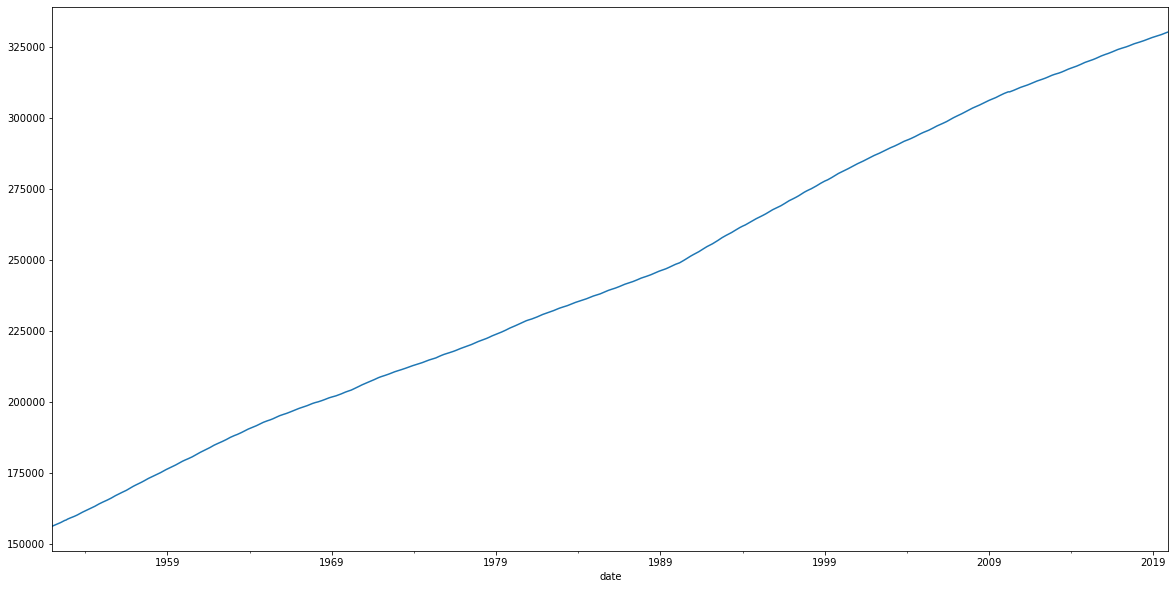

In [91]:
df_copy.value.plot()

# Seasonal decomposition

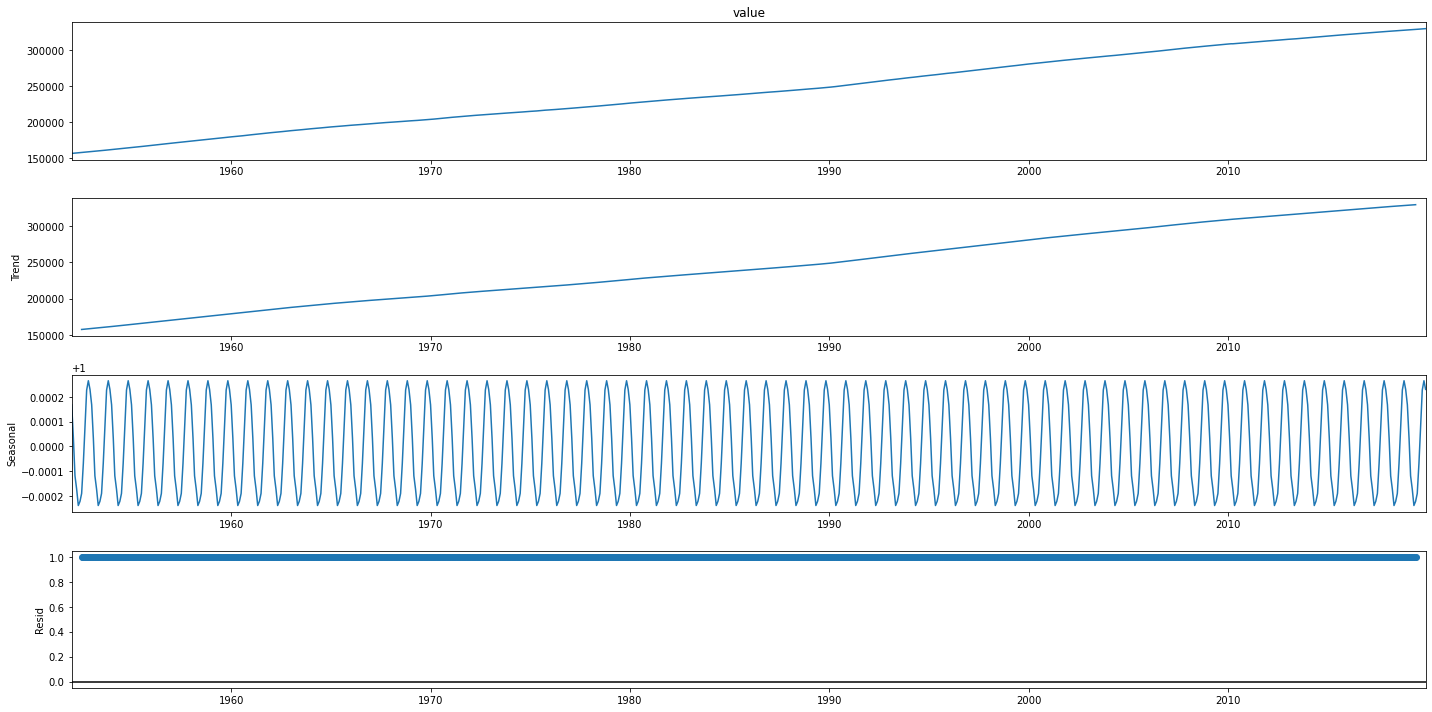

In [59]:
from statsmodels.tsa.seasonal import seasonal_decompose
from matplotlib import pyplot
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (20,10)

series = df_copy.value
result = seasonal_decompose(series, model='multiplicative')
result.plot()
pyplot.show()

In [60]:
from statsmodels.tsa.stattools import adfuller


In [61]:
adfuller(df_copy.value)

(-0.6653174110243981,
 0.8555297778919588,
 17,
 798,
 {'1%': -3.4385711275998583,
  '5%': -2.8651686574447375,
  '10%': -2.568702230639255},
 6593.486797606457)

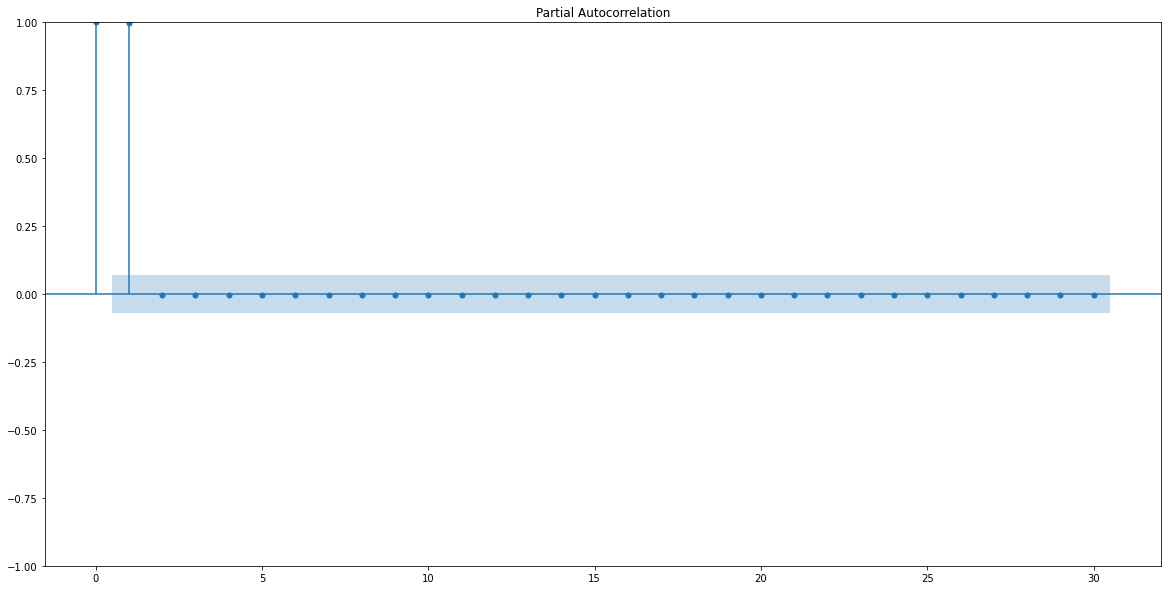

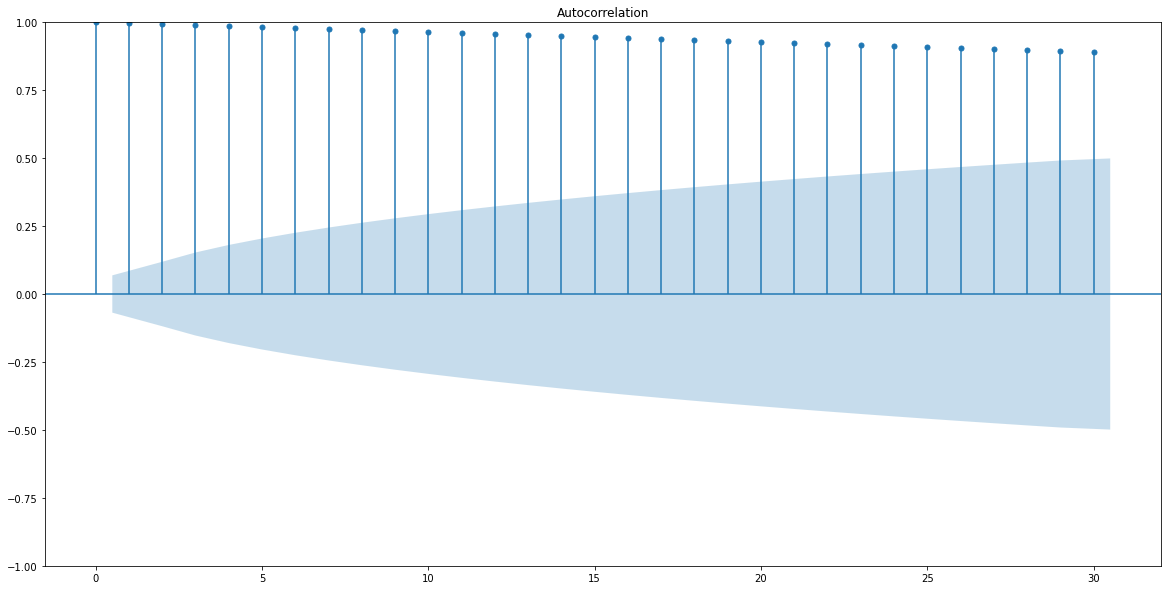

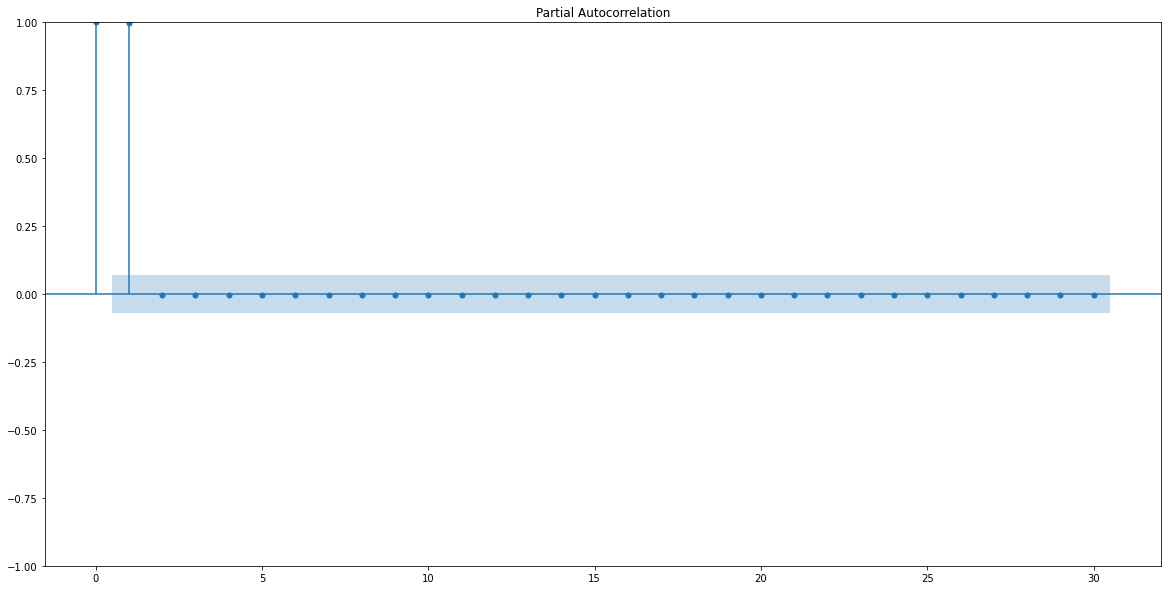

In [62]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(df_copy.value)
plot_pacf(df_copy.value)

In [63]:
df_copy['pc_change'] = df_copy.value.pct_change()


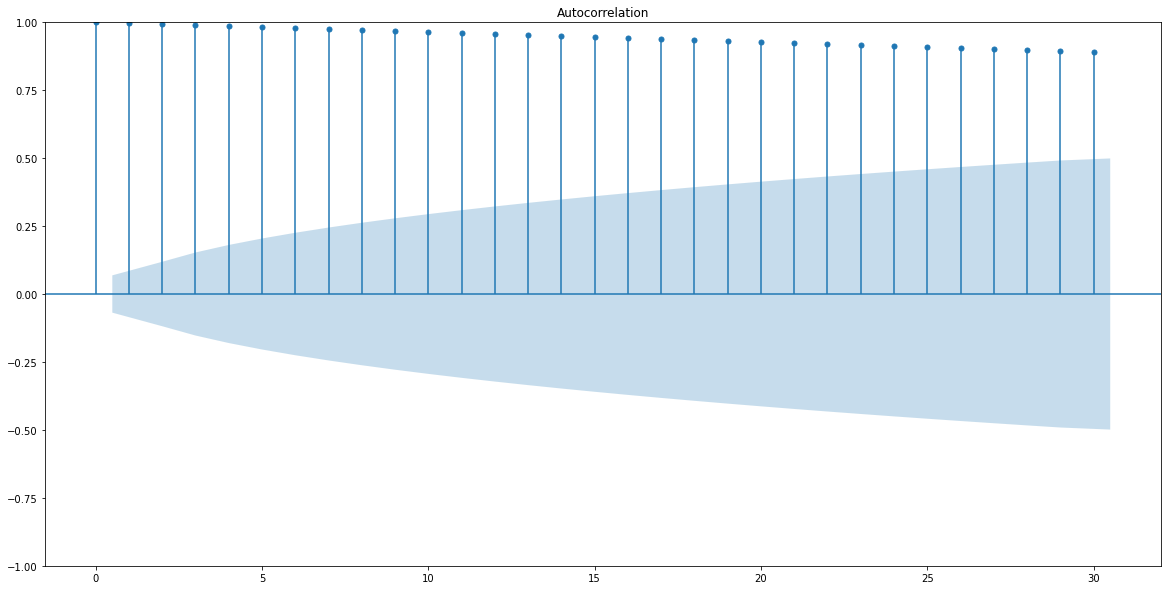

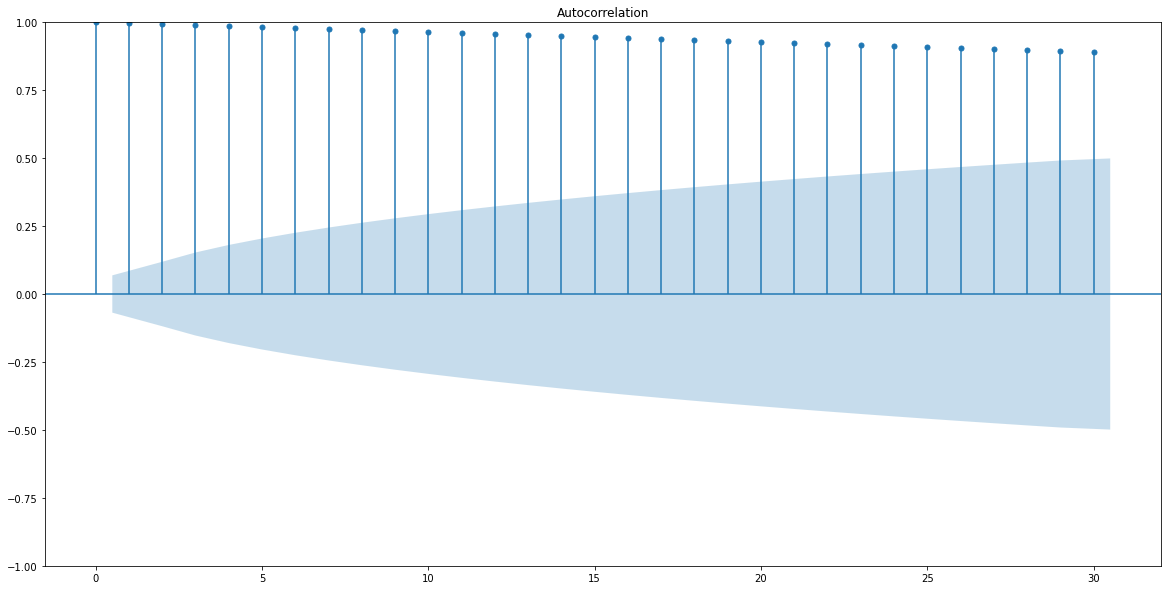

In [64]:
plot_acf(df_copy.value)

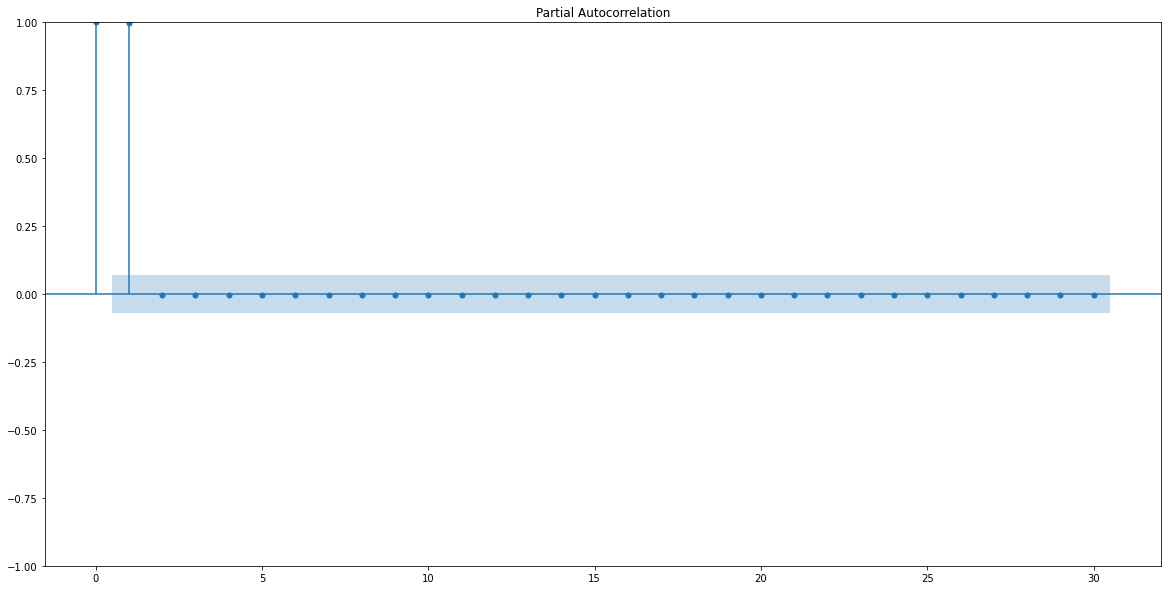

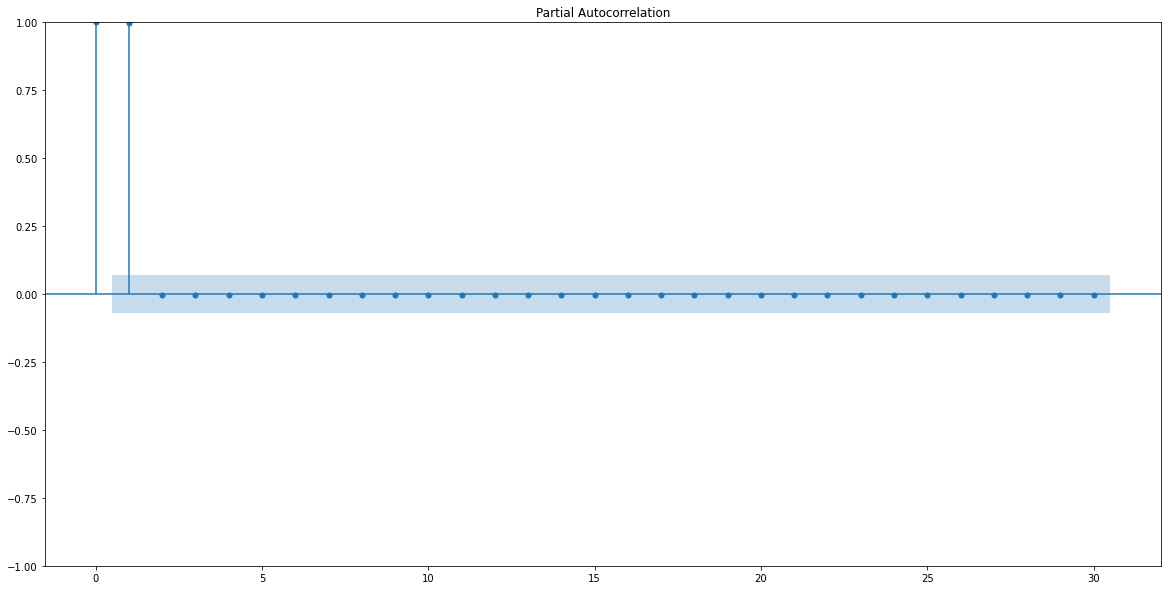

In [65]:
plot_pacf(df_copy.value)

# Stationarity

In [66]:
sqrt_diff = np.sqrt(df_copy.value)

In [67]:
sqrt_diff = sqrt_diff.diff(1).dropna()

In [68]:
sqrt_diff = sqrt_diff.diff(12).dropna()

In [69]:
adfuller(sqrt_diff)

(-5.663649253396384,
 9.257154024260016e-07,
 14,
 788,
 {'1%': -3.4386757994332813,
  '5%': -2.865214793881868,
  '10%': -2.5687268080213355},
 -4254.513422207809)

<AxesSubplot:xlabel='date'>

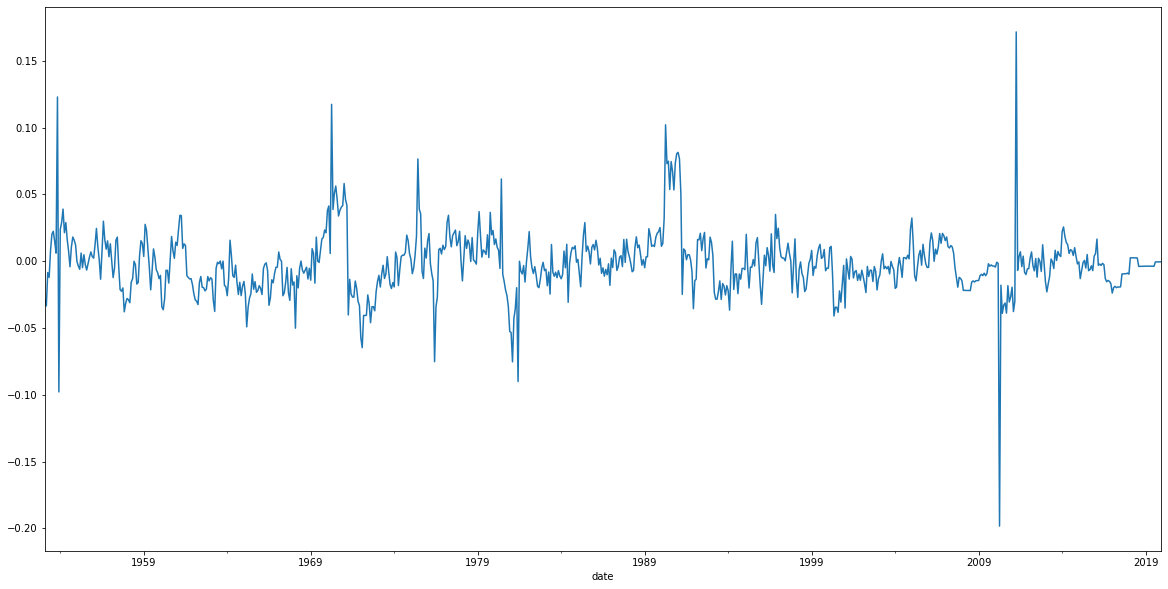

In [70]:
sqrt_diff.plot()

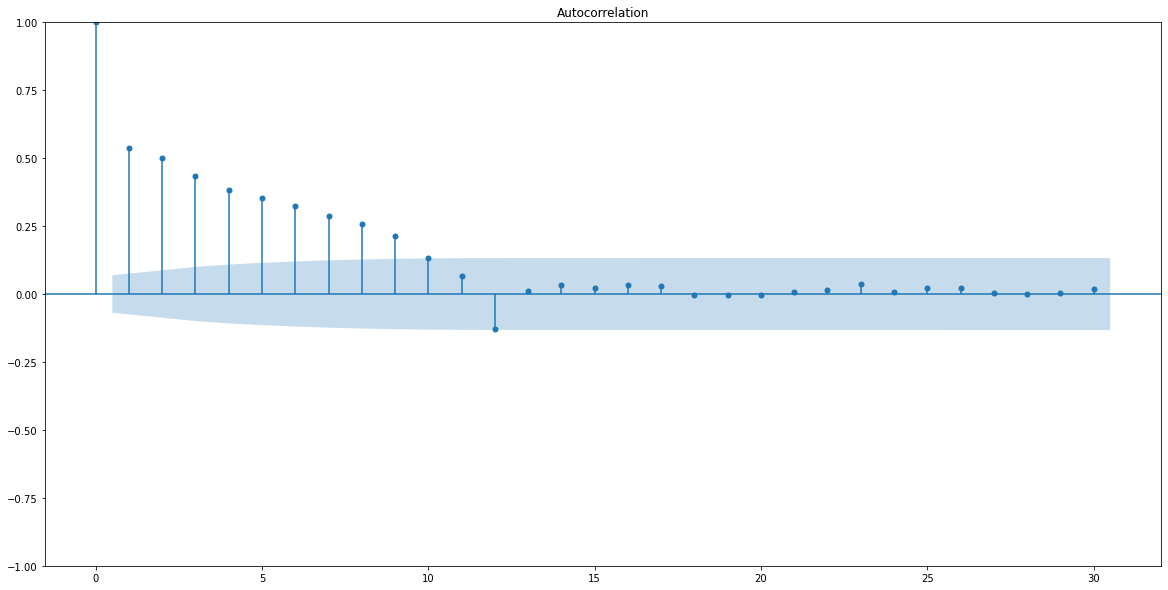

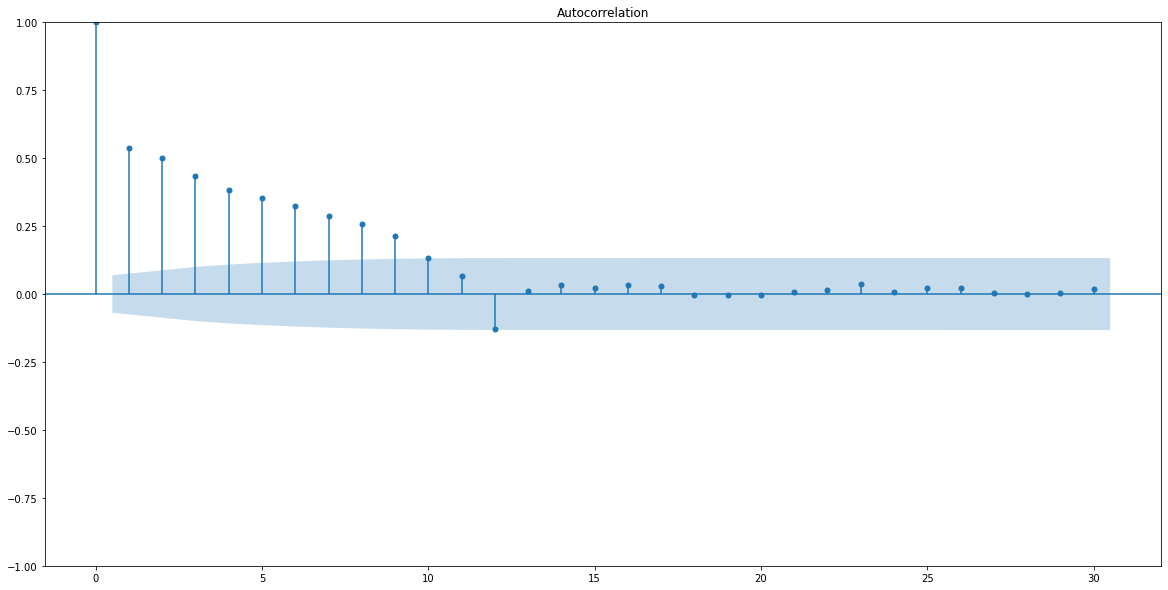

In [71]:
plot_acf(sqrt_diff)

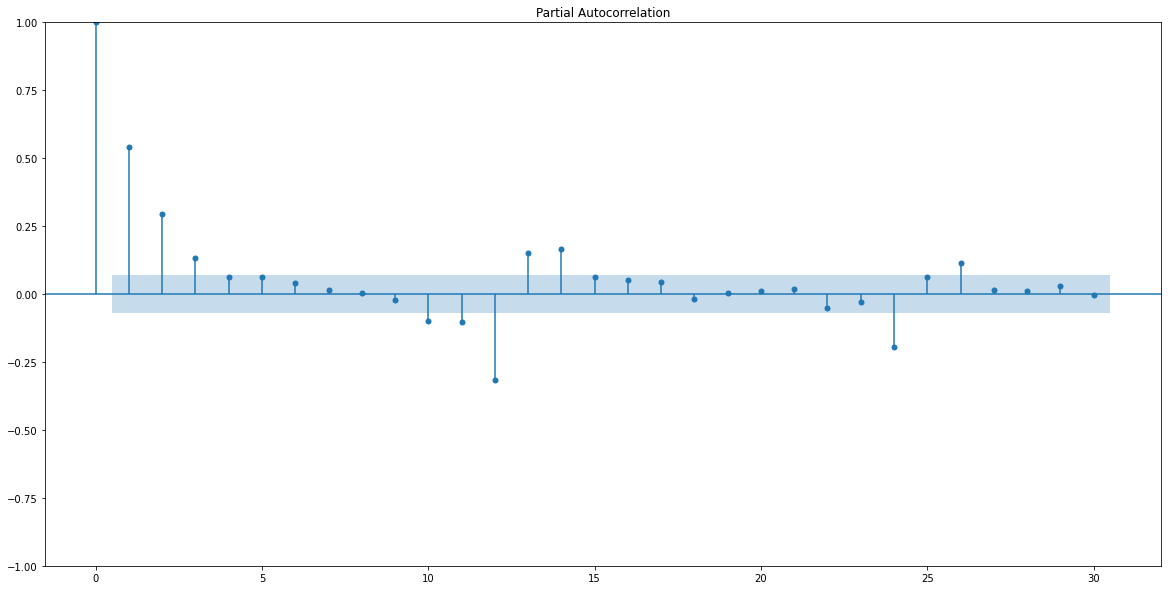

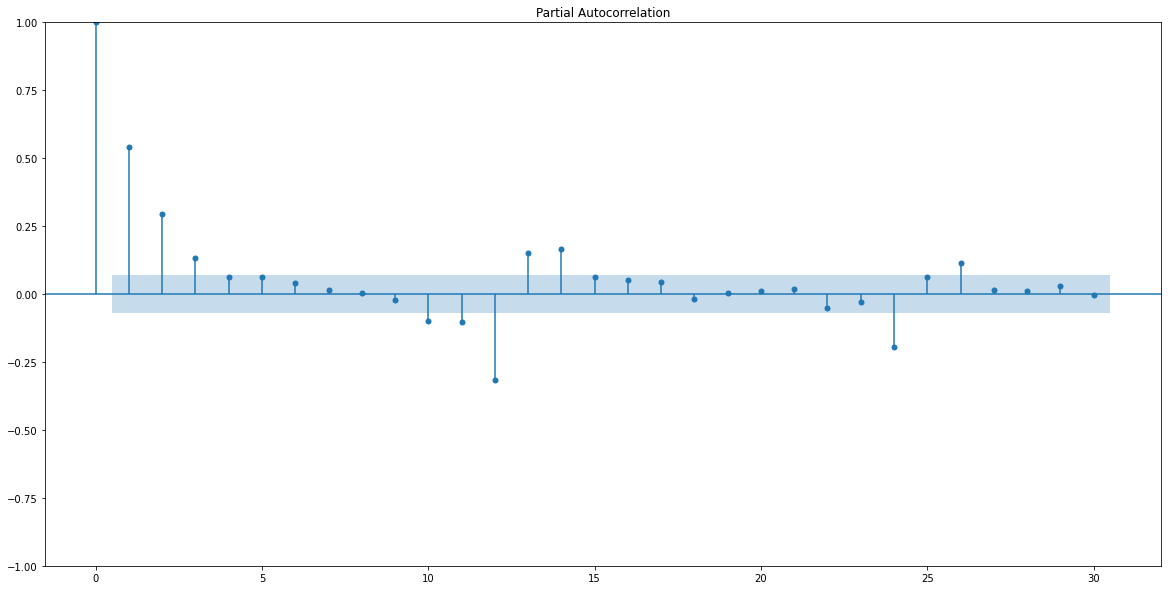

In [72]:
plot_pacf(sqrt_diff)

# Splitting the data

In [73]:
size = int(len(df_copy) * 0.8)
df_tr, df_test = df_copy[ : size], df_copy[size:]

In [74]:
import statsmodels.api as sm
mod = sm.tsa.statespace.SARIMAX(df_tr.value, exogenous = df_tr[['year', 'month']], order=(1,1,1),seasonal_order=(4,1,0,24),enforce_stationarity=False,
                                            enforce_invertibility=False)
results = mod.fit()
print (results.summary())

                                      SARIMAX Results                                      
Dep. Variable:                               value   No. Observations:                  652
Model:             SARIMAX(1, 1, 1)x(4, 1, [], 24)   Log Likelihood               -2105.966
Date:                             Wed, 28 Dec 2022   AIC                           4225.932
Time:                                     12:45:17   BIC                           4255.842
Sample:                                 01-01-1952   HQIC                          4237.639
                                      - 04-01-2006                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9790      0.010     95.399      0.000       0.959       0.999
ma.L1         -0.4232      

# Plot diagnostics

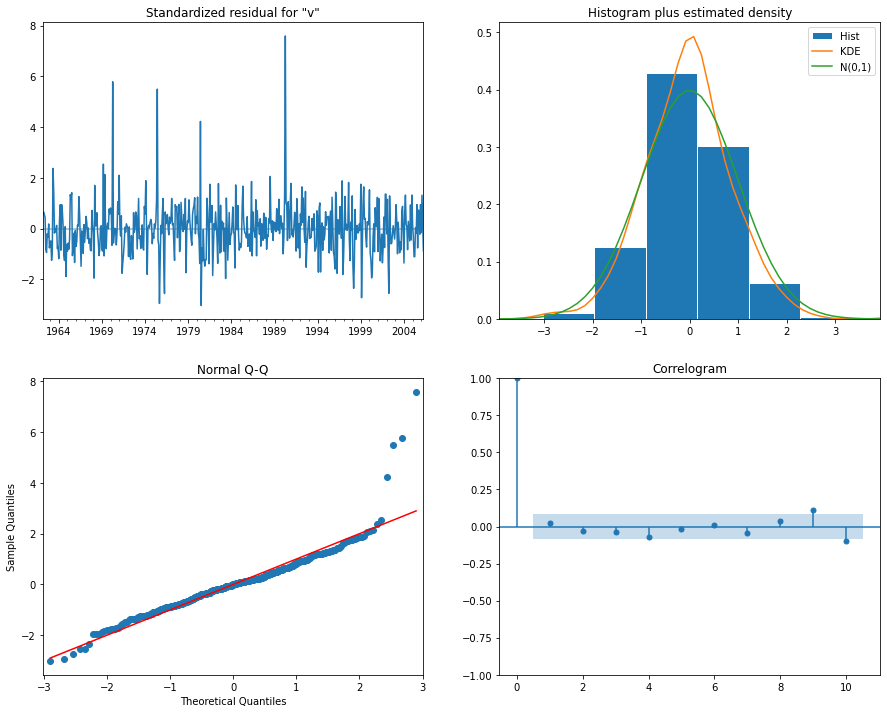

In [75]:
results.plot_diagnostics(figsize=(15, 12))
plt.show()

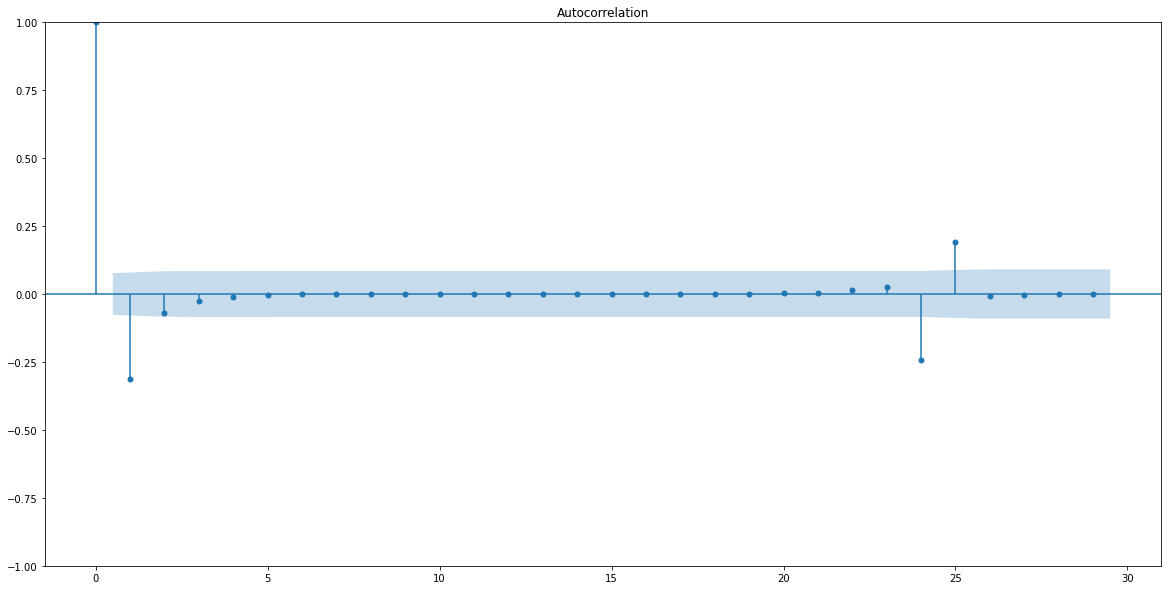

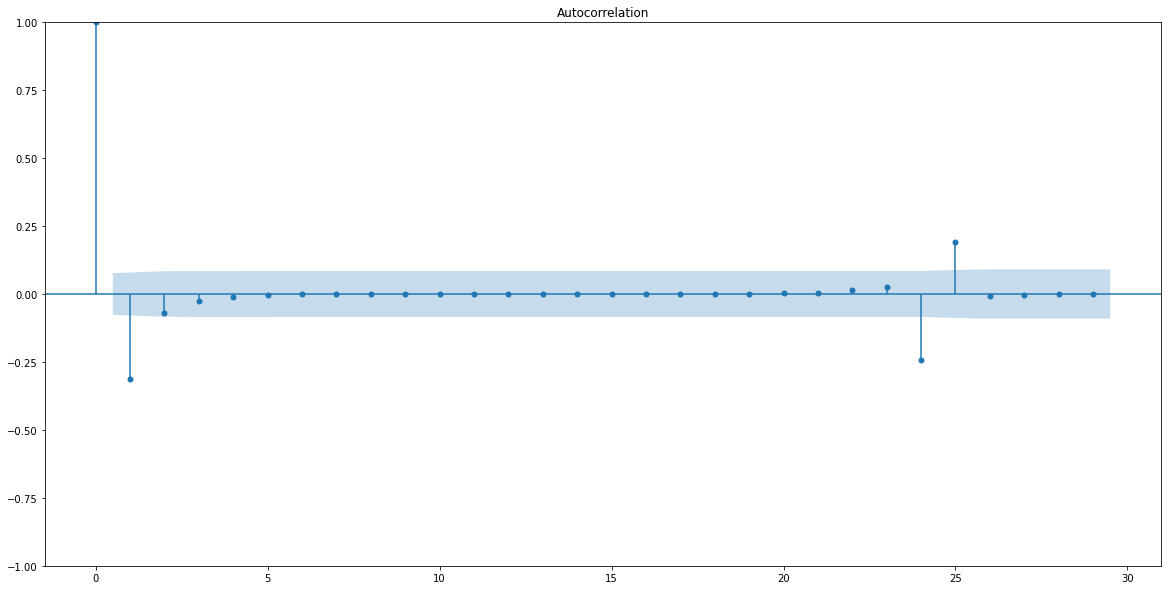

In [76]:
plot_acf(results.resid)


In [77]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                               value   No. Observations:                  652
Model:             SARIMAX(1, 1, 1)x(4, 1, [], 24)   Log Likelihood               -2105.966
Date:                             Wed, 28 Dec 2022   AIC                           4225.932
Time:                                     12:45:18   BIC                           4255.842
Sample:                                 01-01-1952   HQIC                          4237.639
                                      - 04-01-2006                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9790      0.010     95.399      0.000       0.959       0.999
ma.L1         -0.4232      0.039    -10.722      0.000      -0.501      -0.346
ar.S.L24      -0.7568      0.046    -16.469      0.000      -0.847      -0.667
ar.S.L48      -0.5511      0.053    -10.404      0.000      -0.655      -0.447
ar.S.L72      -0.2654      0.048     -5.498      0.000      -0.360      -0.171
ar.S.L96      -0.0346      0.023     -1.522      0.128      -0.079       0.010
sigma2       165.4061      4.326     38.239      0.000     156.928     173.884
===================================================================================
Ljung-Box (L1) (Q):                   0.33   Jarque-Bera (JB):              2224.99
Prob(Q):                              0.56   Prob(JB):                         0.00
Heteroskedasticity (H):               0.75   Skew:                             1.47
Prob(H) (two-sided):                  0.06   Kurtosis:                        12.60
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [78]:
df_test

,value,year,month,day,pc_change
date,,,,,
2006-05-01,298496.000,2006,5,1,0.000721
2006-06-01,298739.000,2006,6,1,0.000814
2006-07-01,298996.000,2006,7,1,0.000860
2006-08-01,299263.000,2006,8,1,0.000893
2006-09-01,299554.000,2006,9,1,0.000972
...,...,...,...,...,...
2019-08-01,329591.333,2019,8,1,0.000596
2019-09-01,329785.872,2019,9,1,0.000590
2019-10-01,329982.035,2019,10,1,0.000595


# Making predictions

In [79]:
start_date = '2006-05-01'
end_date = '2019-01-01'
df_pred_sarima = results.predict(start = start_date, end = end_date)

In [80]:
df_comp = df.copy()
df_comp = df.drop(columns = ['realtime_start', 'realtime_end'])
df_comp['date'] = pd.to_datetime(df_comp['date'])
df_comp = df_comp.set_index('date')

In [81]:
size = int(len(df) * 0.8)
df_x, df_test = df_comp[:size], df_comp[size:]

<AxesSubplot:xlabel='date'>

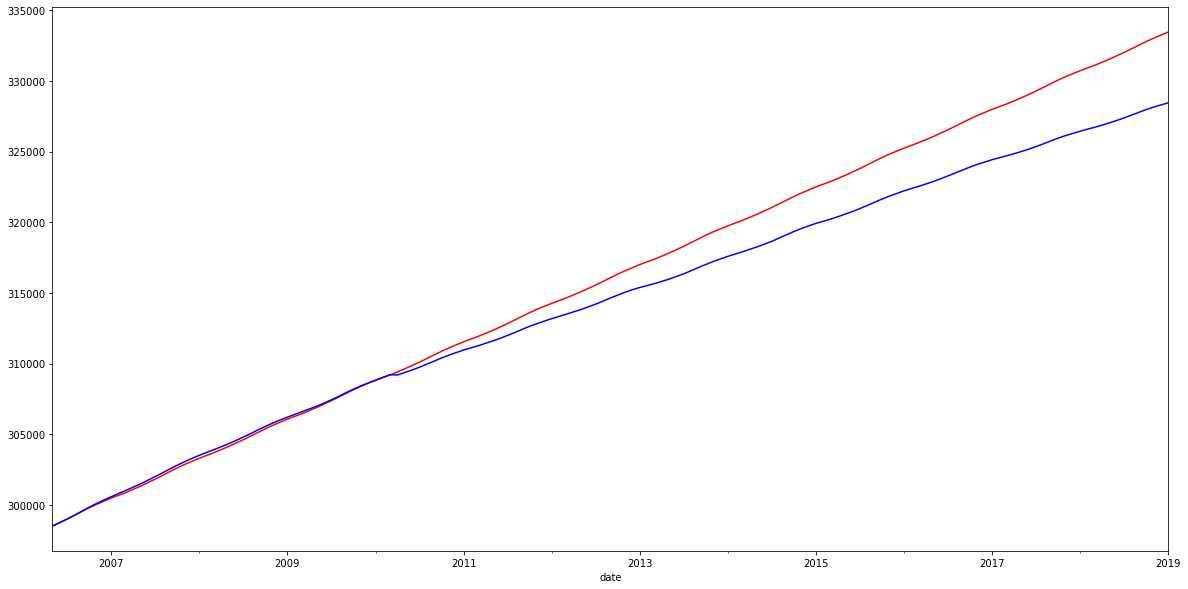

In [82]:
df_pred_sarima[start_date:end_date].plot(color = 'red')
df_comp.value[start_date:end_date].plot(color = 'blue')

In [83]:
forecast_error = df_test[start_date:end_date] - df_pred_sarima[start_date:end_date]

In [84]:
df_pred_sarima[start_date:end_date][1]

298746.5578326964

# Model Evaluation

In [85]:
forecast_error = [df_test[start_date:end_date].value[i] - df_pred_sarima[start_date:end_date][i] for i in range(len(df_test[start_date:end_date]))]

In [86]:
forecast_err = np.square(forecast_error)

In [87]:
mse = np.mean(forecast_err)
print(mse)

5411596.18705184


In [88]:
import math
rmse = math.sqrt(mse)

In [90]:
print("RMSE", rmse)

RMSE 2326.2837718240307
